<a href="https://colab.research.google.com/github/Awaistolu/Machine-learning-projects/blob/main/Documents_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
from sklearn.datasets import fetch_20newsgroups

In [2]:
categories = ['rec.sport.hockey',
               'comp.graphics','soc.religion.christian','talk.politics.misc']

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories,shuffle=True,remove=('headers', 'footers', 'quotes'))

In [4]:
df = pd.DataFrame(newsgroups_train.data,columns=['corpus'])

In [5]:
df['corpus'][0]

"\n   Sean, the 68070 exists! :-)\n\n\n\n   Sean, I don't want to get into a 'mini-war' by what I am going to say,\nbut I have to be a little bit skeptic about the performance you are\nclaiming on the Centris, you'll see why (please, no-flames, I reserve\nthose for c.s.m.a :-) )\n\n   I was in Chicago in the last consumer electronics show, and Apple had a\nbooth there.  I walked by, and they were showing real-time video capture\nusing a (Radious or SuperMac?) card to digitize and make right on the spot\nquicktime movies.  I think the quicktime they were using was the old one\n(1.5).\n\n   They digitized a guy talking there in 160x2xx something.  It played back quite\nnicely and in real time.  The guy then expanded the window (resized) to 25x by\n3xx (320 in y I think) and the frame rate decreased enough to notice that it\nwasn't 30fps (or about 30fps) anymore.  It dropped to like 15 fps.  Then he\nincreased it just a bit more, and it dropped to 10<->12 fps. \n\n   Then I asked him what

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
def stemming(text):
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  text = nltk.word_tokenize(text)
  stem_text = [ps.stem(word) for word in text if word not in set(stopwords.words('english')) and word not in set(string.punctuation)]
  stem_text = ' '.join(stem_text)
  return stem_text

In [8]:
df['clean_text'] = df['corpus'].apply(stemming)

In [9]:
df.head()

,corpus,clean_text
0,"\n Sean, the 68070 exists! :-)\n\n\n\n Sea...",sean exist sean want get mini war go say littl...
1,\nNever was? Probably. Is not now? Debatabl...,never probabl debat valid test think besid fin...
2,Could someone please post the rosters for the ...,could someon pleas post roster colleg hockey s...
3,\n\tIt depends on what kind of the polygons. \...,depend kind polygon convex simpl concav troubl...
4,Yesterday I wrote a program to do bilinear int...,yesterday wrote program bilinear interpol ala ...


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [11]:
tfidf = TfidfVectorizer(max_df=0.95,min_df=5)
x = tfidf.fit_transform(df['clean_text'])

In [12]:
x.shape

(2248, 4550)

In [13]:
kmean = KMeans(n_clusters=4)
kmean.fit(x)

KMeans(n_clusters=4)

In [14]:
single_topic = kmean.labels_[0]

In [15]:
single_topic.argsort()[-10:]

array([0])

In [16]:
from sklearn import cluster
cluster = kmean.labels_

In [17]:
df1 = pd.DataFrame(x.todense()).groupby(cluster).mean()

In [18]:
terms = tfidf.get_feature_names_out()

In [19]:
for index,topic in df1.iterrows():
  print(f'topic {index}')
  print([terms[t] for t in np.argsort(topic)[-15:]])

topic 0
['think', 'truth', 'bibl', 'sin', 'christ', 'faith', 'say', 'peopl', 'church', 'one', 'would', 'believ', 'jesu', 'christian', 'god']
topic 1
['go', 'post', 'say', 'make', 'time', 'state', 'use', 'govern', 'get', 'know', 'like', 'think', 'one', 'would', 'peopl']
topic 2
['color', 'mail', 'window', 'know', 'pleas', 'look', 'help', 'format', 'anyon', 'use', 'program', 'imag', 'graphic', 'thank', 'file']
topic 3
['get', 'leagu', 'score', 'goal', 'playoff', 'go', 'nhl', 'win', 'year', 'season', 'hockey', 'player', 'play', 'team', 'game']


In [29]:
cluster_d = {0:'religion',1:'country',2:'technologies',3:'sports'}
cluster_d

{0: 'religion', 1: 'country', 2: 'technologies', 3: 'sports'}

In [30]:
df['cluster'] = cluster

In [31]:
df.head()

,corpus,clean_text,cluster
0,"\n Sean, the 68070 exists! :-)\n\n\n\n Sea...",sean exist sean want get mini war go say littl...,1
1,\nNever was? Probably. Is not now? Debatabl...,never probabl debat valid test think besid fin...,3
2,Could someone please post the rosters for the ...,could someon pleas post roster colleg hockey s...,3
3,\n\tIt depends on what kind of the polygons. \...,depend kind polygon convex simpl concav troubl...,1
4,Yesterday I wrote a program to do bilinear int...,yesterday wrote program bilinear interpol ala ...,1


In [32]:
df['cluster'] = df['cluster'].map(cluster_d)

In [33]:
df.head()

,corpus,clean_text,cluster
0,"\n Sean, the 68070 exists! :-)\n\n\n\n Sea...",sean exist sean want get mini war go say littl...,country
1,\nNever was? Probably. Is not now? Debatabl...,never probabl debat valid test think besid fin...,sports
2,Could someone please post the rosters for the ...,could someon pleas post roster colleg hockey s...,sports
3,\n\tIt depends on what kind of the polygons. \...,depend kind polygon convex simpl concav troubl...,country
4,Yesterday I wrote a program to do bilinear int...,yesterday wrote program bilinear interpol ala ...,country


In [34]:
df['clean_text'][0]

'sean exist sean want get mini war go say littl bit skeptic perform claim centri see pleas flame reserv c chicago last consum electron show appl booth walk show real time video captur use radiou supermac card digit make right spot quicktim movi think quicktim use old one digit guy talk x xx someth play back quit nice real time guy expand window resiz x xx think frame rate decreas enough notic fp fp anymor drop like fp increas bit drop fp ask mac use use quadra know model tell guy quicktim could play back speed even lcii well spoil claim say sinc quadra mac littl bit troubl even hardisk memori could saw either newer version quicktim hardwar assist centri anoth softwar product run anim like supposedli macromind acceler misunderstand want clarifi sake post comput claim x tad overscan done color comput hardisk fp scala mm agre consid mpeg stuff think multimedia consum low price box lot market think would make longer cd'

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


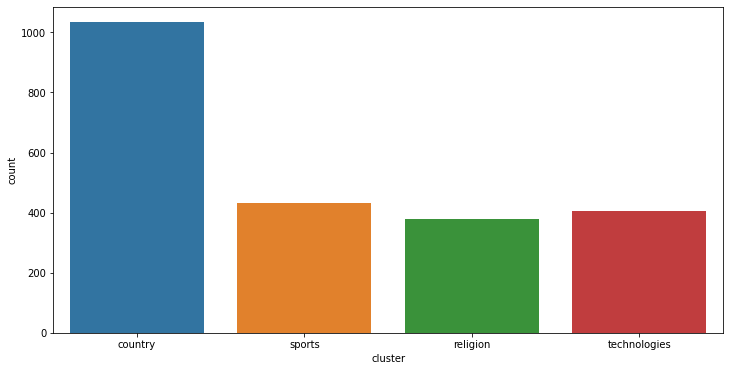

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(df['cluster'])
plt.show()

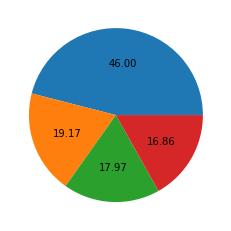

In [37]:

plt.pie(df['cluster'].value_counts(),autopct='%.2f')
plt.show()